# <center> Практика. Статистические тесты в контексте EDA


Исследуйте данные и сделайте выводы по полученным результатам. Подкрепите свои рассуждения и выводы визуализациями и с помощью статистического тестирования проверьте, являются ли выводы статистически значимыми.

В результате анализа будет выявлено:

Kакие факторы влияют на зарплату специалиста Data Scientist.

А так же ответить на ключевые вопросы HR-агентства:
* Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
* Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
* Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
* Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?


На каждый вопрос необходимо ответить с уровнем значимости $\alpha=0.05$.

Данные содержат следующие столбцы:
Наименование столбца	Описание
* **work_year**	Год, в котором была выплачена зарплата.
* **experience_level**	Опыт работы на этой должности в течение года со следующими возможными значениями:
    * EN — Entry-level/Junior;
    * MI — Mid-level/Intermediate;
    * SE — Senior-level/Expert;
    * EX — Executive-level/Director.
* **employment_type**	Тип трудоустройства для этой роли:
    *   PT — неполный рабочий день;
    *   FT — полный рабочий день;
    *   CT — контракт;
    *   FL — фриланс.
* **job_title**	Роль, в которой соискатель работал в течение года.
* **salary**	Общая выплаченная валовая сумма заработной платы.
* **salary_currency**	Валюта выплачиваемой заработной платы в виде кода валюты ISO 4217.
* **salary_in_usd**	Зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com).
* **employee_residence**	Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.
* **remote_ratio**	Общий объём работы, выполняемой удалённо. Возможные значения:
    * 0 — удалённой работы нет (менее 20 %);
    * 50 — частично удалённая работа;
    * 100 — полностью удалённая работа (более 80 %).
* **company_location**	Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166.
* **company_size**	Среднее количество людей, работавших в компании в течение года:
    * S — менее 50 сотрудников (небольшая компания);
    * M — от 50 до 250 сотрудников (средняя компания);
    * L — более 250 сотрудников (крупная компания).

In [1]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
import seaborn as sns

# делаем визуальную настройку графиков
# sns.set_theme("notebook") 
# sns.set_palette("Set2") 

In [2]:
df = pd.read_csv('C:\VS CODE\GIT\sf-1\Task(10-2)HW-02\ds_salaries.csv', sep=',')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\V'
<>:1: SyntaxWarning: invalid escape sequence '\V'
C:\Users\arinathebest\AppData\Local\Temp\ipykernel_8356\40229718.py:1: SyntaxWarning: invalid escape sequence '\V'
  df = pd.read_csv('C:\VS CODE\GIT\sf-1\Task(10-2)HW-02\ds_salaries.csv', sep=',')


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
alpha = 0.05
print('Уровень значимости alpha = {:.2f}'.format(alpha))

Уровень значимости alpha = 0.05


## Описательный анализ данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [5]:
print('Количество дубликатов {}'.format(df[df.duplicated()].shape[0]))

Количество дубликатов 0


### Распределение заработной платы в долларах 


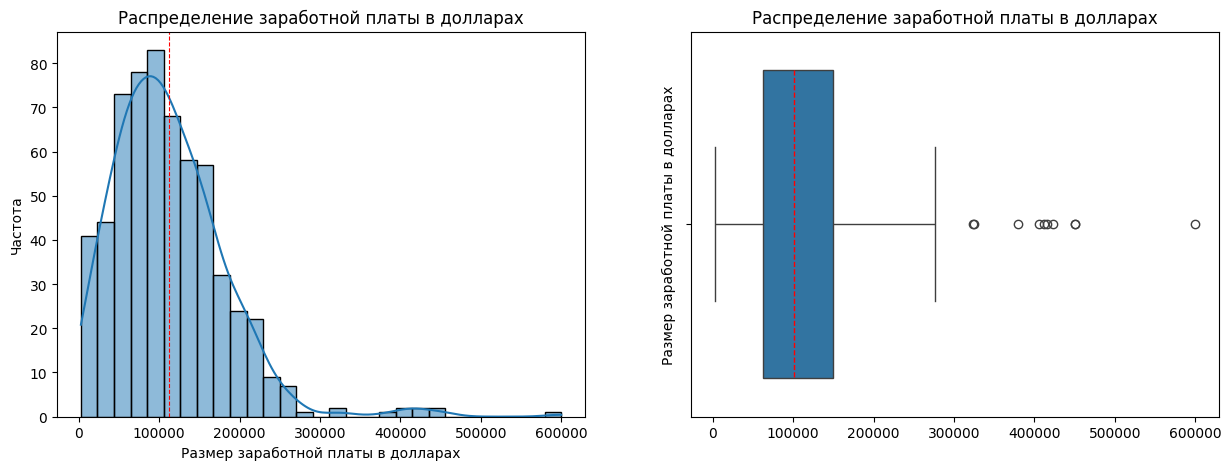

In [6]:

fig, axes = plt.subplots(1,2, figsize= (15,5))

sns.histplot(x=df['salary_in_usd'], kde=True, ax=axes[0])
axes[0].set(xlabel='Размер заработной платы в долларах', ylabel='Частота')
axes[0].set_title('Распределение заработной платы в долларах')
axes[0].axvline(df['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.8)

sns.boxplot(x=df['salary_in_usd'], ax=axes[1], orient='h', medianprops={'color': 'red', 'linestyle':'--'})
axes[1].set(ylabel = 'Размер заработной платы в долларах', xlabel = '')
axes[1].set_title('Распределение заработной платы в долларах')
plt.show()

In [7]:
df_agg = df['salary_in_usd'].describe().round(2).to_frame()
df_agg.columns = ['Размер зарплаты в долларах']
df_agg

,Размер зарплаты в долларах
count,607.00
mean,112297.87
std,70957.26
min,2859.00
25%,62726.00
50%,101570.00
75%,150000.00
max,600000.00


Распределение заработной платы отлично от нормального, имеются выбросы

### Наблюдается ли ежегодный рост зарплаты у специалистов Data Scientist

In [8]:
mask1 = df[df['job_title']=='Data Scientist']

Text(0.5, 1.0, 'Распределение ЗП(доллары) по году работы специалиста Data Scientist')

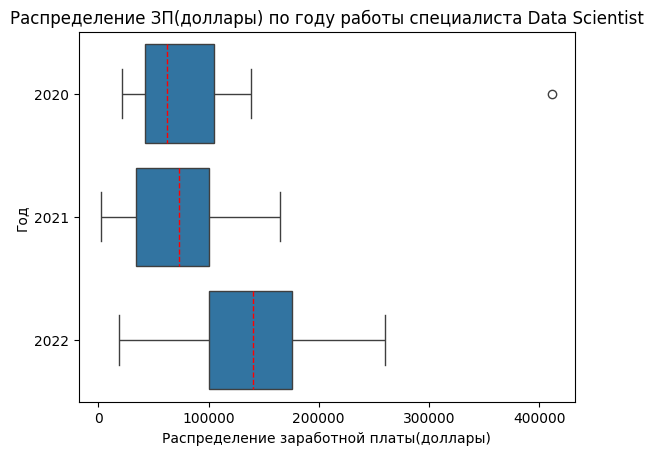

In [9]:
ax = sns.boxplot(data=mask1, x='salary_in_usd', y='work_year', orient='h', medianprops={'color':'red', 'linestyle':'--'})
ax.set(xlabel = 'Распределение заработной платы(доллары)', ylabel = 'Год')
plt.title('Распределение ЗП(доллары) по году работы специалиста Data Scientist')

In [10]:
df_agg = df.groupby('work_year')['salary_in_usd'].describe().round(2)
print('Выплаты специалистам Data Scientist в зависимости от года')
df_agg

Выплаты специалистам Data Scientist в зависимости от года


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,72.0,95813.00,82831.80,5707.0,45724.5,75544.0,115526.0,450000.0
2021,217.0,99853.79,80225.11,2859.0,50000.0,82528.0,135000.0,600000.0
2022,318.0,124522.01,58183.65,10000.0,81666.0,120000.0,160000.0,405000.0


Наблюдается ежегодный рост заработной платы для специалистов Data Scientist. Чтобы являются это значния статистически значимыми, в следующем разделе мы проведем тестирование.

### Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?

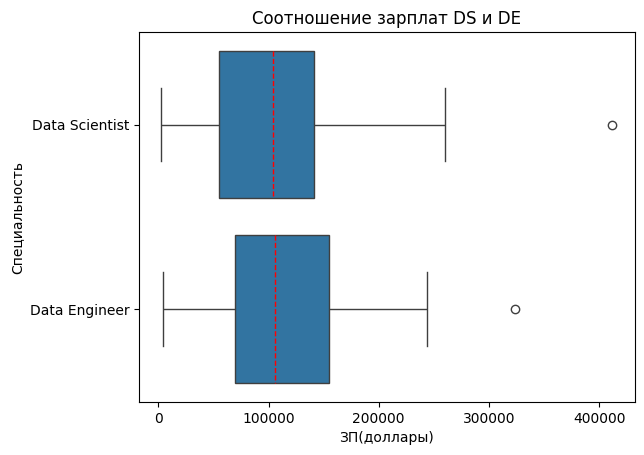

In [11]:
mask2 = df[(df['job_title']=='Data Scientist') | (df['job_title']=='Data Engineer')]
ax= sns.boxplot(data=mask2, x='salary_in_usd', y='job_title', orient='h', medianprops={'color':'red', 'linestyle':'--'})
plt.title('Соотношение зарплат DS и DE')
ax.set(xlabel='ЗП(доллары)', ylabel='Специальность')
plt.show()

In [12]:
df_agg = mask2.groupby('job_title')['salary_in_usd'].describe().round(2)
print('Соотношение зарплат DS и DE')
df_agg

Соотношение зарплат DS и DE


,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Data Engineer,132.0,112725.00,57629.08,4000.0,70039.5,105500.0,154600.0,324000.0
Data Scientist,143.0,108187.83,64112.84,2859.0,54724.0,103691.0,140850.0,412000.0


Соотношения заработных плат в специальностях являются примерно равным. Чтобы определить, являются ли эти данные статистически значимыми, в следующем разделе мы проведем статистические тесы

### Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?


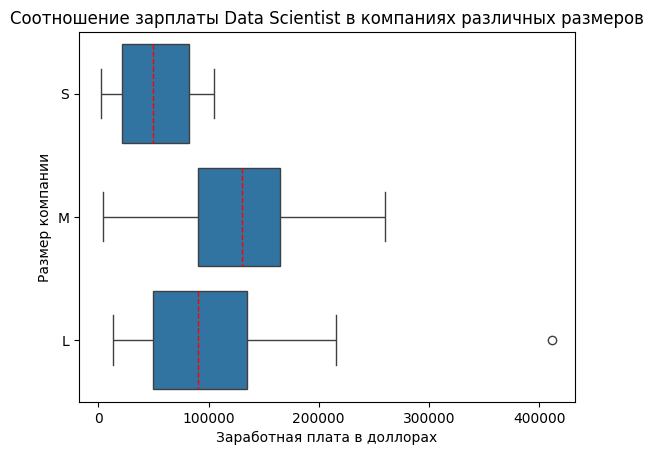

In [13]:
ax = sns.boxplot(data=mask1, x='salary_in_usd', y= 'company_size', orient='h',order=['S', 'M', 'L'], medianprops={'color':'red', 'linestyle':'--'})
ax.set(xlabel='Заработная плата в доллорах', ylabel='Размер компании')
plt.title('Соотношение зарплаты Data Scientist в компаниях различных размеров')
plt.show()

In [14]:
df_agg= df.groupby('company_size',sort=False)['salary_in_usd'].describe().round(2)
df_agg = df_agg.reindex(['S', 'M', 'L'])
print('Соотношение зарплаты для Data Scientist в компаниях различных размеров')
df_agg

Соотношение зарплаты для Data Scientist в компаниях различных размеров


,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
S,83.0,77632.67,63461.71,2859.0,41943.00,65000.0,100000.0,416000.0
M,326.0,116905.47,59287.69,4000.0,78131.50,113188.0,152875.0,450000.0
L,198.0,119242.99,86156.74,5882.0,61041.75,100000.0,154600.0,600000.0


Соотношения зарплаты для DS в компаниях разных размеров различны. Чтобы определить являются ли эти различия статистически значимыми, в следующем разделе проведем статистические тесы

### Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?


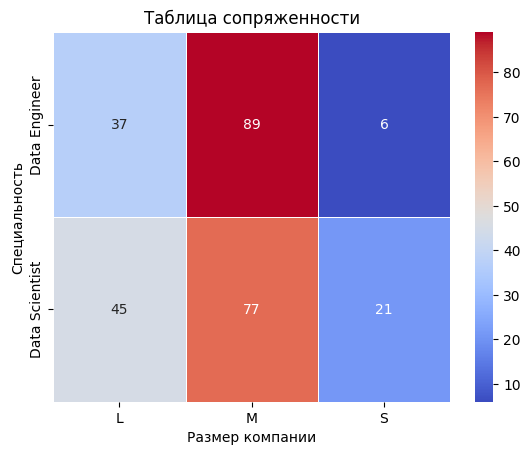

In [15]:
cross_tab = pd.crosstab(index= mask2['job_title'], columns=mask2['company_size'])
ax= sns.heatmap(cross_tab, annot=True, linewidth=.5, fmt='.0f', cmap='coolwarm')
ax.set(xlabel='Размер компании', ylabel='Cпециальность')
plt.title('Таблица сопряженности')
plt.show()

Согласно данным, DE и DS более востребованы в средних и крупных компаниях.Чтобы определить являются ли эти различия статистически значимыми, в следующем разделе мы проведем статистические тесты

## Статистический анализ данных


In [16]:
#функиця для принятия решения о нормальности
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p<=alpha:
        print('p-value меньше, чем заданный уровнь значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-value больше, чем заданный уровень значимости {:.2f}.Распределение нормально'.format(alpha))

#функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p<=alpha:
        print('p-value меньше, чем заданный уровень значимости {:.2f}.Отвергаем нулевую гипотезу в пользу альтернативной'.format(alpha))
    else:
        print('p-value больше, чем заданный уровень значимости {:.2f}. Нет оснований отвергать нулевую гипотезу'.format(alpha))

### Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?


**Сформулируем нулевую и альтернативную гипотезу**

Нулевая гипотеза ($H_0$): зарплата у специалистов Data scientist статистически меньше, либо равна из года в год(2020($μ_0$), 2021($μ_1$), 2022($μ_2$))

$$ H_0 : μ_1 = μ_2 = μ_3 $$

Альтернативная гипотеза ($H_1$): зарплата у специалистов Data Scientist статистически больше из года в год(2020($μ_0$), 2021($μ_1$), 2022($μ_2$))

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 $$

##### Проверка на нормальность

C помощью теста Шапиро-Уилка проверим распределен ли признак нормально.

In [17]:
#зарплаты по годам
salary_2020 = df.loc[df['work_year']==2020, 'salary_in_usd']
salary_2021 = df.loc[df['work_year']==2021, 'salary_in_usd']
salary_2022 = df.loc[df['work_year']==2022, 'salary_in_usd']

print('Для 2020 года:')
result = stats.shapiro(salary_2020)
decision_normality(result[1])

print('Для 2021 года:')
result = stats.shapiro(salary_2021)
decision_normality(result[1])

print('Для 2022 года:')
result = stats.shapiro(salary_2022)
decision_normality(result[1])

Для 2020 года:
p-value = 0.000
p-value меньше, чем заданный уровнь значимости 0.05. Распределение отлично от нормального
Для 2021 года:
p-value = 0.000
p-value меньше, чем заданный уровнь значимости 0.05. Распределение отлично от нормального
Для 2022 года:
p-value = 0.000
p-value меньше, чем заданный уровнь значимости 0.05. Распределение отлично от нормального


##### Выберем подходящий статистический тест

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:

* Какой тип у признака "work_year"? = Количественный.
* Сколько сравнивыемых групп? = 3
* Группы зависимы? = Нет
* Признак распределен по нормальному закону? = Нет

Для проверки нашей гипотезы можно использовать критерий Краскела-Уоллиса

##### Проводим тест

In [18]:
#Проводим тест
_, p = stats.kruskal(salary_2020, salary_2021, salary_2022)
decision_hypothesis(p)

p-value = 0.000
p-value меньше, чем заданный уровень значимости 0.05.Отвергаем нулевую гипотезу в пользу альтернативной


**Вывод**:
Зарплаты увеличиваются ежегодно для специалистов Data Scientists

### Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?


**Сформулируем нулевую и альтернативную гипотезы**

Нулевая гипотезa($H_0$): Медианные зарплаты Data Scientist($µ_0$) и Data Engineer($µ_1$) равны
$$ µ_0 = µ_1 $$
Альтернативная гипотеза($H_1$): Медианные зарплаты Data Scientist($µ_0$) и Data Engineer($µ_1$) не равны
$$ µ_0 \neq µ_1 $$

#### Выберем подходящий статистический тест

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака зарплата? - Колличественный 
* Сколько сравнивыемых групп? - Две
* Проверяется ли независимоть групп? - Да

Для проверки гипотезы можно использовать U-критерий Манна-Уитни

#### Проведем тест

In [19]:
#Создаем переменные для теста
DS_2022 = df[(df['job_title']=='Data Scientist') & (df['work_year']==2022)]['salary_in_usd']
DE_2022 = df[(df['job_title']=='Data Engineer')&(df['work_year']==2022)]['salary_in_usd']
#Проводим тест
_,p = stats.mannwhitneyu(DS_2022,DE_2022, alternative='two-sided')
decision_hypothesis(p)

p-value = 0.155
p-value больше, чем заданный уровень значимости 0.05. Нет оснований отвергать нулевую гипотезу


**Вывод:**
Нет оснований отвергать гипотезу, что медианные зарплаты для DS и  DE равны

### Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?


**Сформулируем нулевую и альтернатиную гипотезы**

*Нулевая гипотеза*: между зарплатми специалистов DS в разных компаниях нет взаимосвязи

*Альтернативная гипотеза*: между зарплатами специалистов DS в разных компаниях есть связь

**Проверка на нормальность распределения**

С помощью теста Шапиро-Уилка проверим, распределен ли признак нормально

In [37]:
S_salary = df.loc[(df['job_title']=='Data Scientist') & (df['company_size']=='S')]['salary_in_usd']
M_salary = df.loc[(df['job_title']=='Data Scientist')&(df['company_size']=='M')]['salary_in_usd']
L_salary = df.loc[(df['job_title']=='Data Scientist')&(df['company_size']=='L')]['salary_in_usd']

#Проверка на нормальность
print('Для компаний размера S:')
result = stats.shapiro(S_salary)
decision_normality(result[1])
print('Для компаний размера M:')
result = stats.shapiro(M_salary)
decision_normality(result[1])
print('Для компаний размера L:')
result = stats.shapiro(L_salary)
decision_normality(result[1])

Для компаний размера S:
p-value = 0.189
p-value больше, чем заданный уровень значимости 0.05.Распределение нормально
Для компаний размера M:
p-value = 0.639
p-value больше, чем заданный уровень значимости 0.05.Распределение нормально
Для компаний размера L:
p-value = 0.000
p-value меньше, чем заданный уровнь значимости 0.05. Распределение отлично от нормального


##### Выберем подходящий статистический тест
Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака "зарплата"? - категориальный
* Сколько сравниваемых групп? - 3
* Группы зависимы? - Нет
* Признак распределен по нормальному закону? - Нет 

Для проверки нашей гипотезы можно использовать критерий Краксела-Уоллиса
##### Проведем тест

In [39]:
#Проводим тест
_, p = stats.kruskal(S_salary, M_salary, L_salary)
decision_hypothesis(p)

p-value = 0.000
p-value меньше, чем заданный уровень значимости 0.05.Отвергаем нулевую гипотезу в пользу альтернативной


Вывод: 
Между размером компании и зарплатой специалистов DS есть связь

## Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?


**Cформулируем нулевую и альтернативную гипотезы**

*Нулевая гипотеза:* между наличием должностей Data Scientist, Data Engineer и размером компании связи нет

*Альтернативная гипотеза:* между наличием должностей Data Scientist, Data Engineer и размером компании есть связь

**Выберем подходящий статистический тест**
Для выбора нужного тесте воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признаков 'Размер компании'? - Категориальный
* Сколько сравниваемых групп?- 3
* Проверяется ли независимость групп? - Да
Для проверки нашей гипотезы можно использовать критерий хи-квадрат

In [45]:
job_DS_DE = df.query("job_title in ['Data Scientist', 'Data Engineer']")
cross_tab = pd.crosstab(job_DS_DE['job_title'], job_DS_DE['company_size'])
cross_tab

company_size,L,M,S
job_title,,,
Data Engineer,37,89,6
Data Scientist,45,77,21


In [46]:
# Проводим тест
_, p, _, _, = stats.chi2_contingency(cross_tab)
decision_hypothesis(p)

p-value = 0.008
p-value меньше, чем заданный уровень значимости 0.05.Отвергаем нулевую гипотезу в пользу альтернативной


**Вывод:** между наличием должностей Data Scientist, Data Engineer и размером компании есть связь

## Итоговые результаты исследования

* Зарплаты увеличиваются ежегодно для специалистов Data Scientists
* Медианные зарплаты для DS и  DE равны
* Между размером компании и зарплатой специалистов DS есть связь
* Между наличием должностей Data Scientist, Data Engineer и размером компании есть связь